#Creating VGG16 model for dataset

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import seaborn as sns
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def vgg16():
    # Create VGG16 model 
    model = Sequential()
    model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name='vgg16'))
    
    model.add(Flatten(name='Flatten'))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dense(units=128,activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    return model

In [4]:
def compile(model):
    #Compile the model
    opt = Adam(learning_rate=0.001)
    print(model.summary())
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy',Recall()])
    
    return model

In [5]:
def fitting(model):
    es = EarlyStopping(patience=5)
    history = model.fit(
        train_generator, epochs=8, validation_data=val_generator,
        verbose=True, callbacks=[es]
    )
    return history

In [6]:
#Instantiate the model
vgg16_model = vgg16()

2023-03-22 16:12:30.349286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 16:12:30.350055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [7]:
compile(vgg16_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                    

In [8]:
# Fit the model
history_vgg16 = fitting(vgg16_model)

Epoch 1/8


2023-03-22 16:12:33.232807: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-22 16:12:33.737687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - ETA: 0s - loss: 0.6421 - accuracy: 0.7224 - recall: 0.9863

2023-03-22 16:14:52.675254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 145s 973ms/step - loss: 0.6421 - accuracy: 0.7224 - recall: 0.9863 - val_loss: 0.5865 - val_accuracy: 0.7368 - val_recall: 1.0000
Epoch 2/8
148/148 [==============================] - 143s 962ms/step - loss: 0.5877 - accuracy: 0.7288 - recall: 1.0000 - val_loss: 0.5773 - val_accuracy: 0.7368 - val_recall: 1.0000
Epoch 3/8
148/148 [==============================] - 143s 961ms/step - loss: 0.5876 - accuracy: 0.7288 - recall: 1.0000 - val_loss: 0.5918 - val_accuracy: 0.7368 - val_recall: 1.0000
Epoch 4/8
148/148 [==============================] - 143s 965ms/step - loss: 0.5867 - accuracy: 0.7288 - recall: 1.0000 - val_loss: 0.5785 - val_accuracy: 0.7368 - val_recall: 1.0000
Epoch 5/8
148/148 [==============================] - 154s 1s/step - loss: 0.5865 - accuracy: 0.7288 - recall: 1.0000 - val_loss: 0.5795 - val_accuracy: 0.7368 - val_recall: 1.0000
Epoch 6/8
148/148 [==============================] - 153s 1s/step - loss: 0.5862 - accuracy: 0.728

Text(0.5, 1.0, 'Accuracy Evolution')

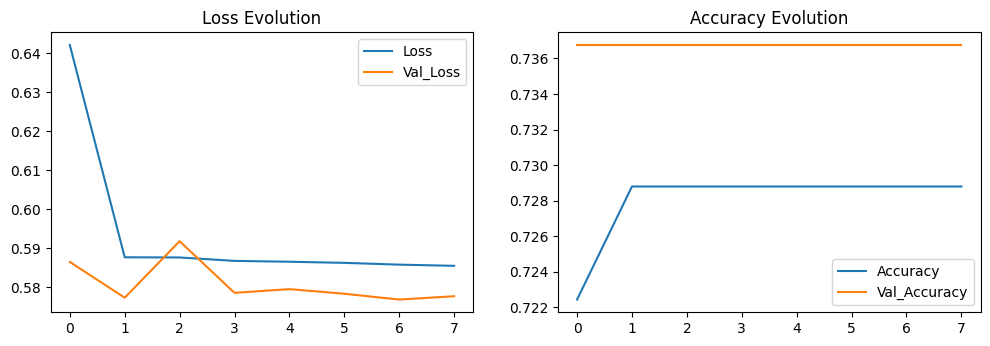

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_vgg16.history['loss'], label='Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history_vgg16.history['accuracy'], label='Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')